High count transposed shape: (3034, 192, 240)
Low count transposed shape: (3034, 192, 240)
Shape einzelnes High-Count-Bild: (192, 240)
Shape einzelnes Low-Count-Bild: (192, 240)


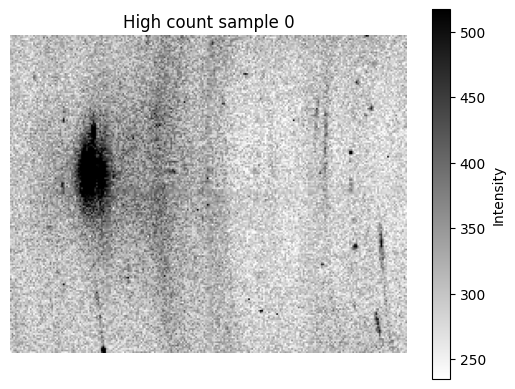

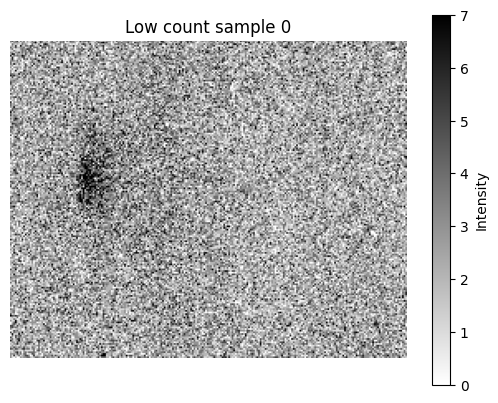

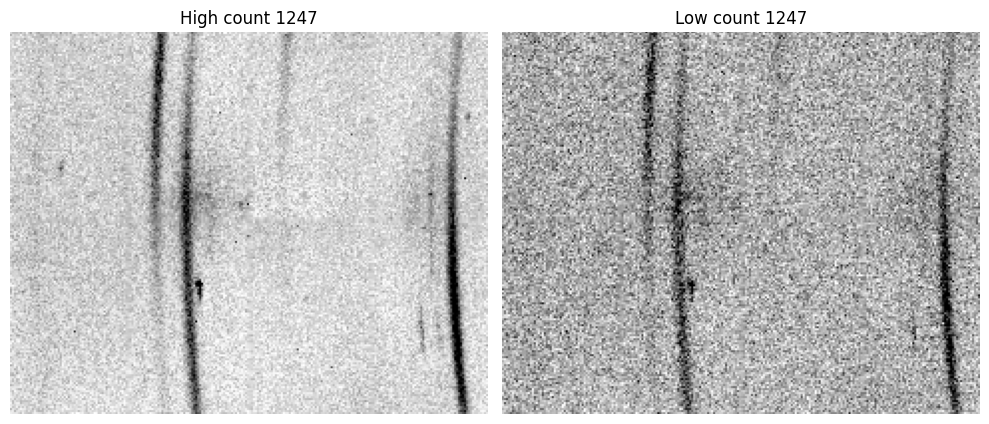

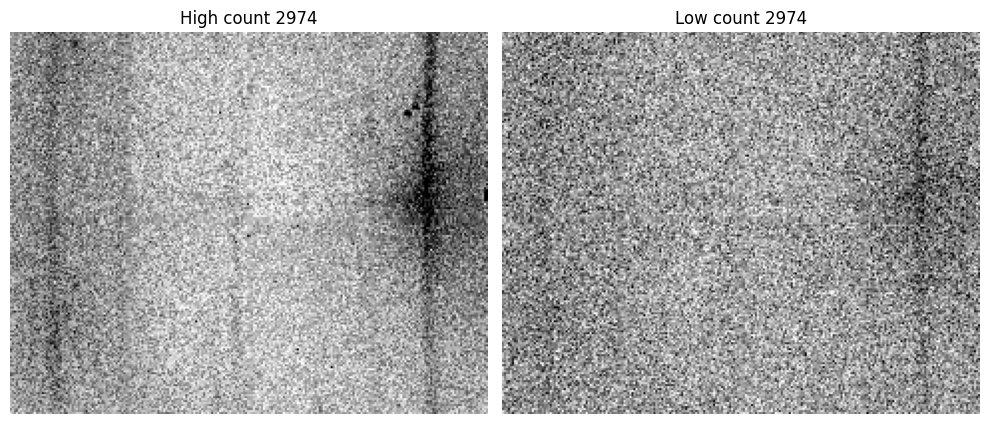

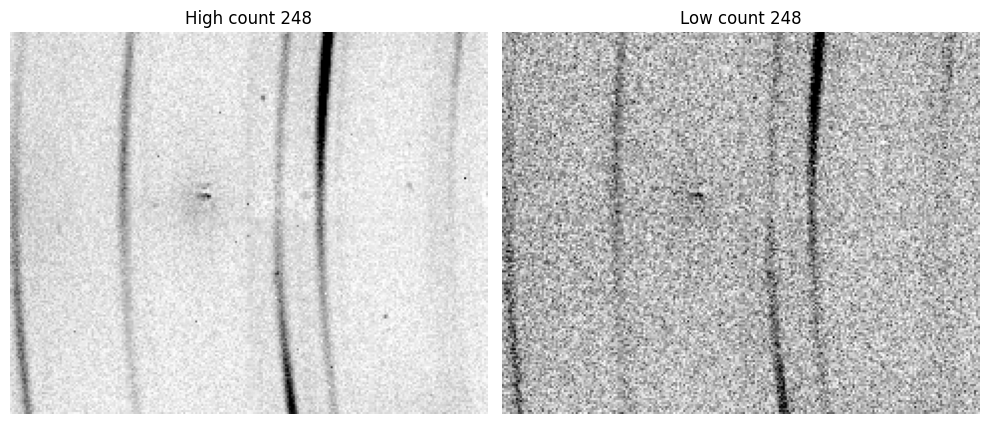

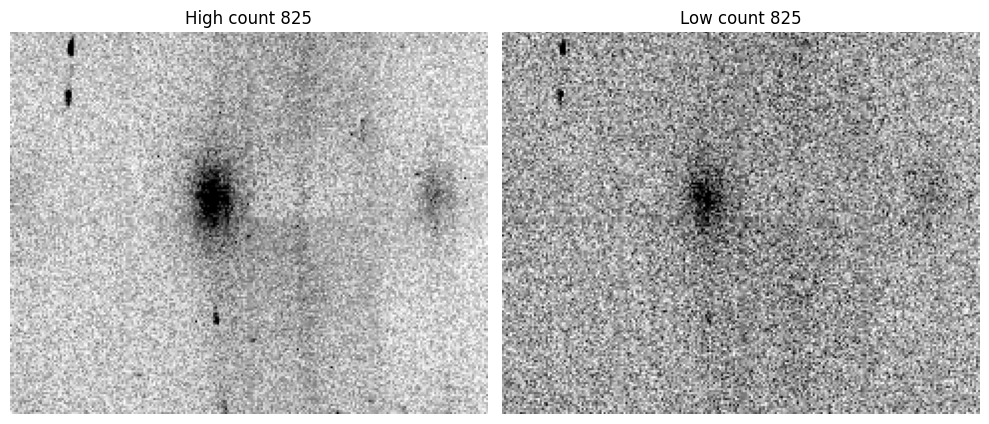

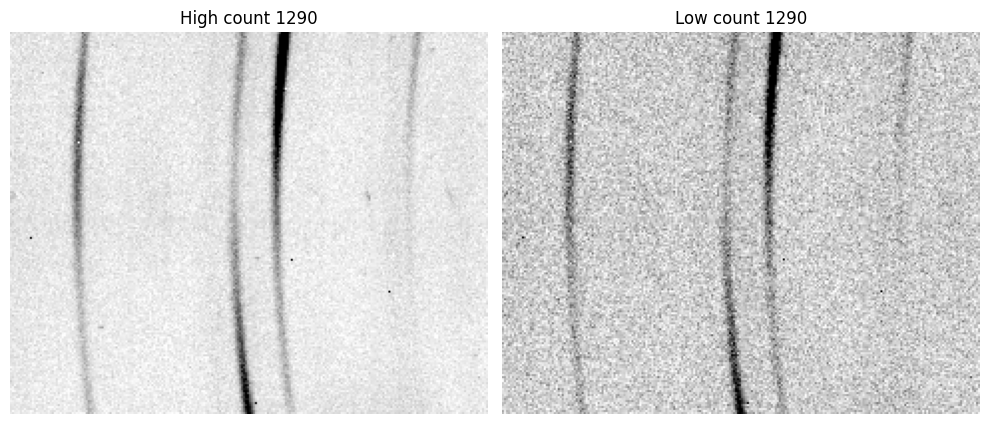

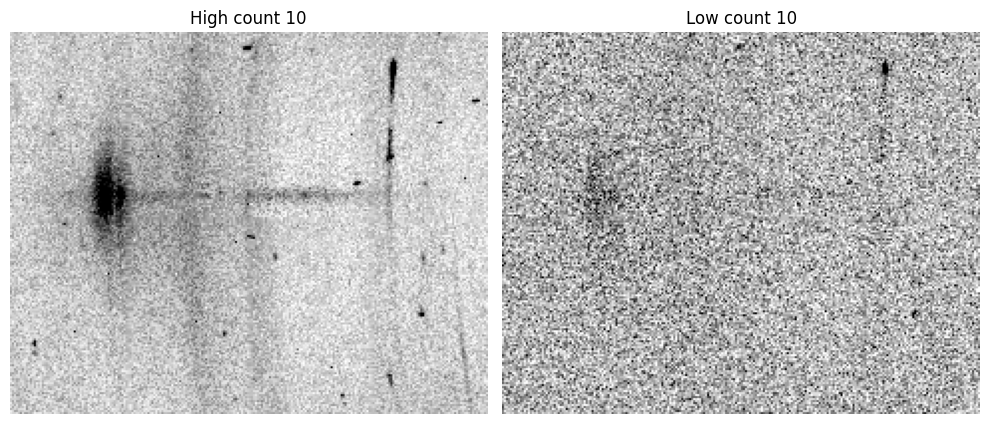

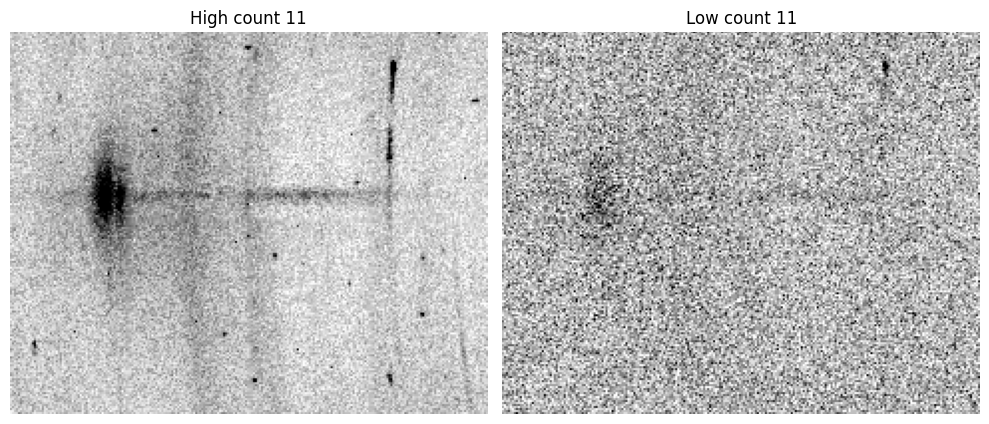

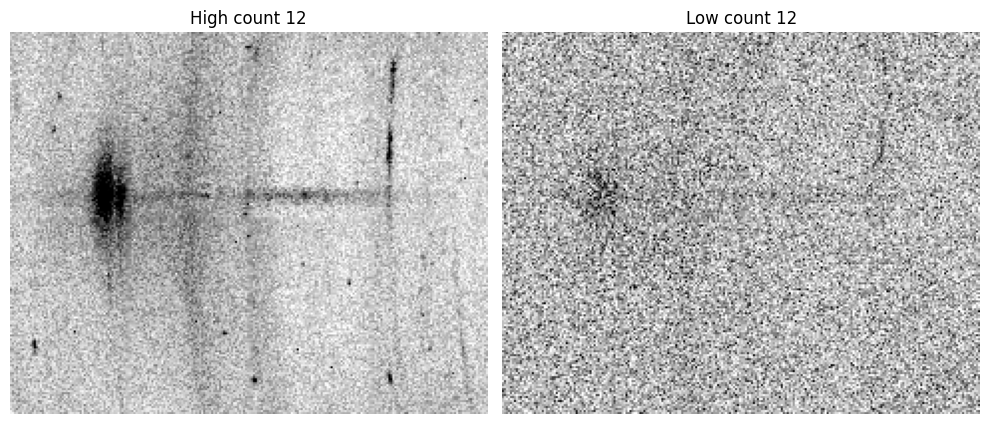

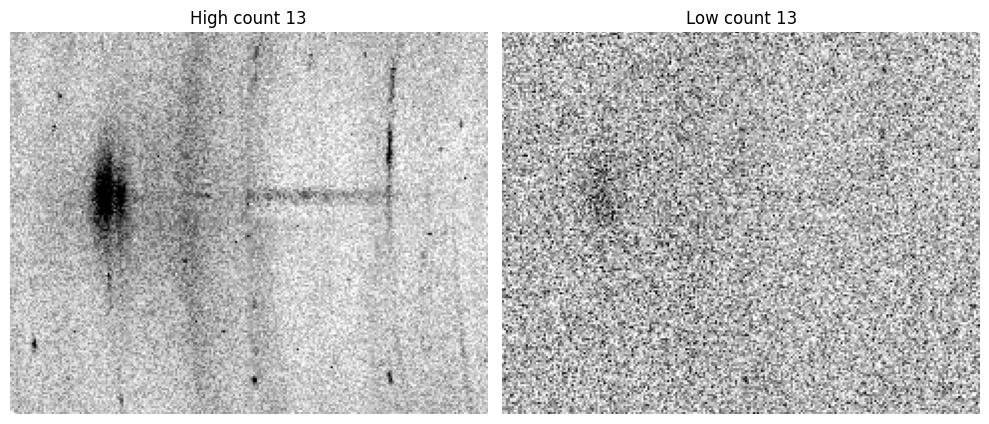

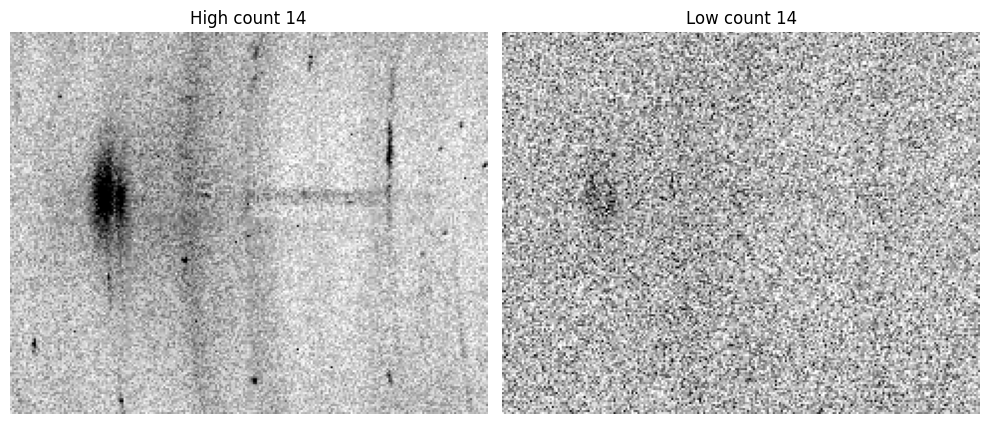

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


def show_image(img, title="Image"):
    # Dynamischen Bereich setzen (z.B. 1. bis 99. Perzentil)
    vmin, vmax = np.percentile(img, (1, 99))
    
    plt.imshow(img, cmap="gray_r", origin="lower", aspect="equal", vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis("off")
    plt.colorbar(label="Intensity")
    plt.show()


def show_pair(high_img, low_img, idx, p_low=1, p_high=99.5):
    # Per-Bild-Perzentile (separat für High und Low)
    def robust_minmax(img):
        vals = img.ravel()
        # Wenn alles (fast) gleich ist, fallback auf min/max
        vmin, vmax = np.percentile(vals, (p_low, p_high))
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmax <= vmin:
            vmin, vmax = float(vals.min()), float(vals.max() + 1e-6)
        return vmin, vmax

    vmin_h, vmax_h = robust_minmax(high_img)
    vmin_l, vmax_l = robust_minmax(low_img)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(high_img, cmap="gray_r", origin="lower", aspect="equal",
                   vmin=vmin_h, vmax=vmax_h)
    axes[0].set_title(f"High count {idx}")
    axes[0].axis("off")

    axes[1].imshow(low_img, cmap="gray_r", origin="lower", aspect="equal",
                   vmin=vmin_l, vmax=vmax_l)
    axes[1].set_title(f"Low count {idx}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()





file_path = "test_data.hdf5"

with h5py.File(file_path, "r") as f:
    high_data = f["/high_count/data"][:]   # (192, 240, 3034)
    low_data = f["/low_count/data"][:]     # (192, 240, 3034)

# Achsen so drehen, dass es (Anzahl, Höhe, Breite) ist (Matlab hat andere Reiehnfolge)
high_data = high_data.transpose(2, 0, 1)   # (3034, 192, 240)
low_data = low_data.transpose(2, 0, 1)     # (3034, 192, 240)

print("High count transposed shape:", high_data.shape)
print("Low count transposed shape:", low_data.shape)

# Erstes Bild
high_img = high_data[0]
low_img = low_data[0]

print("Shape einzelnes High-Count-Bild:", high_img.shape)
print("Shape einzelnes Low-Count-Bild:", low_img.shape)

"""
print("High count sample 0 (Matrix):")
print(high_img)
print("\nLow count sample 0 (Matrix):")
print(low_img)
"""

# Anzeigen
show_image(high_img, "High count sample 0")
show_image(low_img, "Low count sample 0")

# Wahl der Paare
indices = np.random.choice(len(high_data), 5, replace=False)
for i in indices:
    show_pair(high_data[i], low_data[i], i)

for i in range(10, 15):
    show_pair(high_data[i], low_data[i], i)
